In [23]:
import geopandas 
import pandas as pd
pd.set_option('max_colwidth', 200)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns 
sns.set()
import descartes
%matplotlib inline
from random import sample


In [24]:
# downloaded from here: http://data-cityofmadison.opendata.arcgis.com/datasets/city-limit

madison = geopandas.read_file("City_Limit")

madison.head()



,OBJECTID,SHAPESTAre,SHAPESTLen,geometry
0,1312,5.274004e+05,3.378551e+03,"POLYGON ((-89.36924133213829 43.10153277072625, -89.3692408278648 43.10153637358616, -89.3692341092617 43.10158425390286, -89.3692159261995 43.10175346395089, -89.36916188700012 43.10183600852923,..."
1,1313,2.675664e+04,7.126214e+02,"POLYGON ((-89.28523345356945 43.02112710884431, -89.28616420064958 43.02112291481558, -89.28617164325907 43.02141549418872, -89.2852424042313 43.02142470281184, -89.28523345356945 43.02112710884431))"
2,1314,1.488101e+05,3.297256e+03,"POLYGON ((-89.28049139471618 43.11701006709443, -89.27974120313569 43.11624165073002, -89.27980331140699 43.11621089426142, -89.27985950096566 43.11617547060047, -89.27996045690345 43.116113224734..."
3,1315,2.259798e+09,1.133896e+06,"POLYGON ((-89.5331291634087 43.0857426328395, -89.53311129030814 43.0857282179282, -89.5330938649239 43.08571351094758, -89.53307689832434 43.08569852088815, -89.53306039420174 43.08568325224702, ..."


In [25]:
# downloaded from here: http://data-cityofmadison.opendata.arcgis.com/datasets/c46082b091a941f8b2ded1dd115a1a05_8

lakes = geopandas.read_file("Lakes_and_Rivers")

lakes.head()

,OBJECTID,SHAPESTAre,SHAPESTLen,geometry
0,1,39958.447479,782.327754,"POLYGON ((-89.49887223021146 43.08164301711978, -89.49900540038394 43.08158449056285, -89.49930034603122 43.08159060384336, -89.49946128883784 43.08159406065624, -89.49965367569884 43.081600240386..."
1,2,31880.854431,797.842450,"POLYGON ((-89.48481873925945 43.08431142416414, -89.48497090612122 43.08414206692869, -89.48508015137674 43.08409207567873, -89.48535938521653 43.08409795538043, -89.48553115709277 43.084067683715..."
2,3,3699.958649,814.712984,"POLYGON ((-89.51718402551259 43.10277473207884, -89.51724867424106 43.10275347572637, -89.5172997193301 43.10274220732491, -89.51732586621891 43.10273718646417, -89.51733885738551 43.1027346923016..."
3,4,1174.258911,797.157265,"POLYGON ((-89.5186932397623 43.10267727786282, -89.51866089637853 43.10267481003529, -89.51863195951275 43.10267483440332, -89.51860132134554 43.10267486019609, -89.51857749011411 43.1026736327162..."
4,5,40693.432434,848.431555,"POLYGON ((-89.54301597807076 43.10090510287239, -89.54301467109856 43.10090509525021, -89.54301336538653 43.10090510382852, -89.54301205970809 43.10090512950858, -89.54301075529163 43.100905172289..."


In [26]:
geopandas.read_file("MetroBusRoutes.gdb")

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,agency_id,jurisdiction_id,location_type,parent_station,relative_position,cardinal_direction,wheelchair_boarding,primary_street,address_range,cross_location,Route,Route_Dir,Shelter,Bench,Schedule,Light,Reaitime,PK_MD_WE,geometry
0,5,0005,W Dayton & N Orchard (EB),This stop (#0005) is eastbound on the 1299 block of Dayton St (w) farside Orchard St (n),43.070947,-89.406982,MMT,CMAD,0,NaN,1,90.0,1,W Dayton,1299,N Orchard,80,None,0.0,0.0,0.0,0.0,0,111,POINT (815072.7736249999 481466.68625)
1,10,0010,Langdon & N Park (WB),This stop (#0010) is westbound on the 898 block of Langdon St nearside Park St (n),43.075933,-89.400154,MMT,CMAD,0,NaN,3,270.0,1,Langdon,898,N Park,"80, 81, 82",None,1.0,0.0,1.0,0.0,0,111,POINT (816896.9087499999 483284.47)
2,25,0025,Langdon & N Lake (EB),This stop (#0025) is eastbound on the 699 block of Langdon St farside Lake St (n),43.075691,-89.396944,MMT,CMAD,0,NaN,1,90.0,1,Langdon,699,N Lake,81,None,0.0,0.0,0.0,0.0,0,001,POINT (817754.656375 483196.5052499999)
3,39,0039,N Lake & W Johnson (NB),This stop (#0039) is northbound on the 299 block of Lake St (n) nearside Johnson St (w),43.071895,-89.397341,MMT,CMAD,0,NaN,3,0.0,1,N Lake,299,W Johnson,80,None,1.0,0.0,1.0,0.0,0,111,POINT (817648.9837499999 481812.847875)
4,45,0045,Langdon & N Carroll (EB),This stop (#0045) is eastbound on the 99 block of Langdon St farside Carroll St (n),43.078482,-89.389820,MMT,CMAD,0,NaN,1,90.0,0,Langdon,99,N Carroll,81,None,0.0,0.0,0.0,0.0,0,001,POINT (819657.8265 484214.470375)
5,47,0047,Babcock & Linden (NB),This stop (#0047) is northbound on the 499 block of Babcock Dr nearside Linden Dr,43.074636,-89.412598,MMT,UWIS,0,NaN,3,0.0,1,Babcock,499,Linden,27,None,0.0,0.0,0.0,0.0,0,100,POINT (813571.889125 482811.08575)
6,49,0049,N Lake & Langdon (NB),This stop (#0049) is northbound on the 599 block of Lake St (n) nearside Langdon St,43.075529,-89.397191,MMT,CMAD,0,NaN,3,0.0,1,N Lake,599,Langdon,"80, 81, 82",None,0.0,0.0,0.0,0.0,0,111,POINT (817688.6745 483137.4371249999)
7,50,0050,Spring & N Brooks (WB),This stop (#0050) is westbound on the 998 block of Spring St nearside Brooks St (n),43.069442,-89.402267,MMT,CMAD,0,NaN,3,270.0,1,Spring,998,N Brooks,27,None,0.0,0.0,0.0,0.0,0,100,POINT (816332.8668749999 480918.3867499999)
8,52,0052,Observatory & N Charter (WB),This stop (#0052) is westbound on the 1198 block of Observatory Dr nearside Charter St (n),43.076131,-89.405660,MMT,UWIS,0,NaN,3,270.0,1,Observatory,1198,N Charter,"80, 81",None,1.0,0.0,1.0,0.0,0,111,POINT (815425.6754999999 483356.298875)
9,53,0053,Observatory & North Hall (EB),This stop (#0053) is eastbound on the 1099 block of Observatory Dr adjacent North Hall,43.075781,-89.403882,MMT,UWIS,0,NaN,2,90.0,1,Observatory,1099,North Hall,81,None,0.0,0.0,0.0,0.0,0,001,POINT (815900.788375 483228.825)


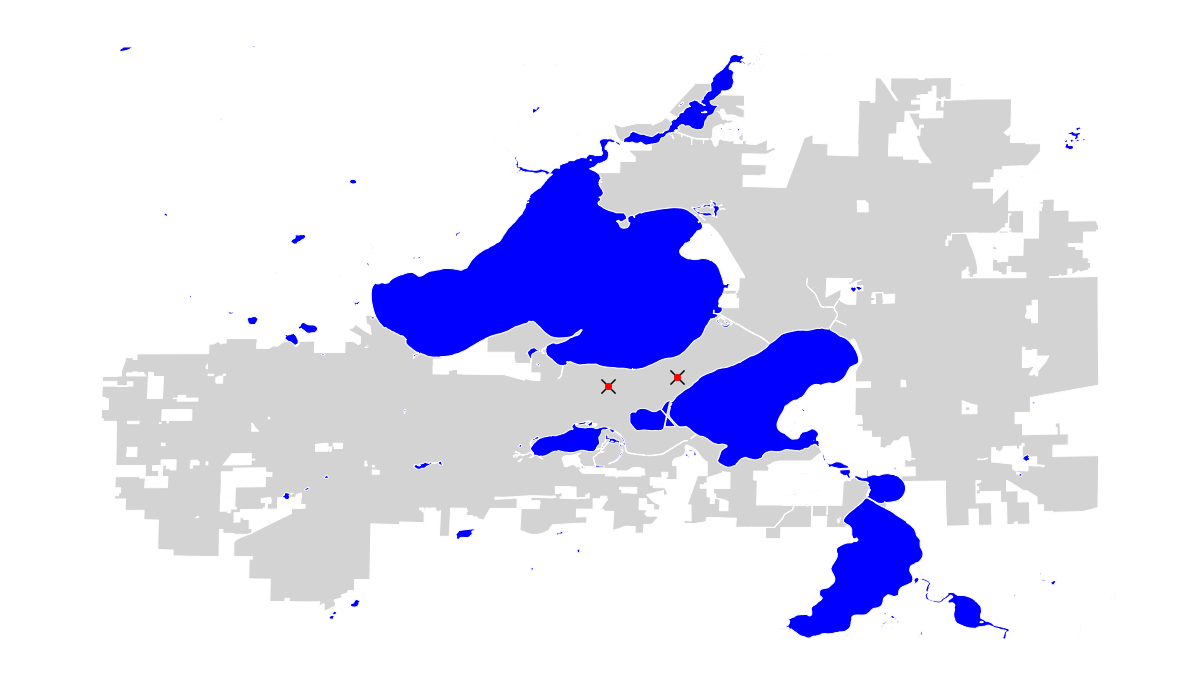

In [27]:
# DataFrames with geo data
buildings = pd.DataFrame([
    {"name":"cs", "loc": Point(-89.406749, 43.071478)},
    {"name":"capital", "loc": Point(-89.384054, 43.074617)},])

buildings = geopandas.GeoDataFrame(buildings, geometry="loc")

# create plot from all three
ax = madison.plot(color="lightgray", figsize=(20,20))
buildings.plot(color="black", marker="x", markersize=200, ax=ax)
lakes.plot(color="blue", ax=ax)
buildings.plot(color="red", ax=ax)

ax.set_axis_off()



In [28]:
#metro data
metro_data = geopandas.read_file("MetroBusRoutes.gdb")
list_metro = []
for index, row in metro_data.iterrows():
    list_metro.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

metro_series = pd.Series(list_metro)
metro_coord = pd.DataFrame({"Coordinates": metro_series})
metro_coord = geopandas.GeoDataFrame(metro_coord, geometry='Coordinates')



In [29]:
#BRT data
brt_data = geopandas.read_file("BRT.gdb")
list_brt = []
for index, row in brt_data.iterrows():
    list_brt.append(Point(float(row["stop_lon"]),float(row["stop_lat"])))

brt_series = pd.Series(list_brt)
brt_coord = pd.DataFrame({"Coordinates": brt_series})
brt_coord = geopandas.GeoDataFrame(brt_coord, geometry='Coordinates')



In [30]:
brt_data

,stop_id,stop_name,stop_lat,stop_lon,MetroID,Notes,Type,geometry
0,91002.0,EB W JOHNSON fs ORCHARD,43.072131,-89.406937,581.0,Relo back from ns Charter,None,POINT (815084.5170408934 481897.2863806486)
1,91003.0,EB W JOHNSON fs E CAMPUS MALL,43.071971,-89.398723,NaN,None,None,POINT (817279.4755774736 481839.4246197194)
2,91005.0,EB STATE ns FAIRCHILD,43.074698,-89.388293,883.0,None,None,POINT (820066.1402797252 482834.4921833873)
3,91006.0,EB MAIN fs CARROLL,43.073430,-89.383650,1101.0,None,None,POINT (821307.0577453822 482372.7949440628)
4,91007.0,EB EAST WASH fs WEBSTER,43.076406,-89.381458,1323.0,None,None,POINT (821892.2708138078 483457.8242700547)
5,91008.0,EB EAST WASH ns LIVINGSTON,43.080819,-89.375170,1927.0,,None,POINT (823571.6263789684 485067.1983478963)
6,91010.0,EB EAST WASH fs BALDWIN,43.087386,-89.365828,1883.0,Pull out if no bus lane,None,POINT (826065.9550517201 487462.3562872261)
7,92010.0,WB EAST WASH fs BALDWIN,43.087234,-89.366644,1730.0,None,None,POINT (825848.0443983078 487406.8514769822)
8,92008.0,WB EAST WASH ns LIVINGSTON,43.081283,-89.375140,1392.0,None,None,POINT (823579.4859433025 485236.2865923941)
9,92007.0,WB EAST WASH fs WEBSTER,43.076000,-89.382464,1618.0,None,None,POINT (821623.4619682282 483309.9518623948)


In [31]:
#metro bus route data 2017
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes
geopandas.read_file("Metro_Transit_Bus_Routes")
# list_brt = []
# for index, row in brt_data.iterrows():
#     list_brt.append(row["geometry"])

# brt_series = pd.Series(list_brt)
# brt_coord = pd.DataFrame({"Coordinates": brt_series})
# brt_coord = geopandas.GeoDataFrame(brt_coord, geometry='Coordinates')


,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry
0,187,8298,1,http://www.cityofmadison.com/Metro/schedules/Route01/,32379.426524,"(LINESTRING (-89.38430221207501 43.07047635977001, -89.38428121190509 43.0705373601211, -89.38426521137477 43.07060036009443, -89.38425521199169 43.07066535968137, -89.38425021085587 43.0707293598..."
1,188,8299,2,http://www.cityofmadison.com/Metro/schedules/Route02/,96906.965571,"(LINESTRING (-89.47360325726927 43.05361825724362, -89.47338725732303 43.05361825767731, -89.47331225290935 43.05478725771124, -89.47328325208264 43.05514725783299, -89.47323625099583 43.055471258..."
2,189,8300,3,http://www.cityofmadison.com/Metro/schedules/Route03/,76436.645644,"(LINESTRING (-89.43821226373039 43.05146029403106, -89.43732226309318 43.05149029507514, -89.43727026352222 43.05150429495208, -89.43722026354595 43.05152429566951, -89.43717426248627 43.051551295..."
3,190,8301,4,http://www.cityofmadison.com/Metro/schedules/Route04/,64774.133485,"(LINESTRING (-89.4039192992476 43.03861632452722, -89.40390729866857 43.03868432488672, -89.40390029872773 43.03875232501646, -89.40389729863578 43.03882132511839, -89.40389629795033 43.0390213245..."
4,191,8302,5,http://www.cityofmadison.com/Metro/schedules/Route05/,61216.722662,"(LINESTRING (-89.39413829878922 43.03848633406434, -89.3939542993125 43.03848333463834, -89.39394029557421 43.03983233467387, -89.39393729348716 43.04041533562184, -89.39393029043534 43.0417573357..."
5,192,8303,6,http://www.cityofmadison.com/Metro/schedules/Route06/,151142.298370,"(LINESTRING (-89.44309525725302 43.05353328933764, -89.44319425680258 43.05354128953648, -89.44329425809356 43.0535452890586, -89.44339425720975 43.05354428944301, -89.44349325711997 43.0535382891..."
6,193,8304,7,http://www.cityofmadison.com/Metro/schedules/Route07/,98617.005665,"(LINESTRING (-89.47339526743841 43.04999425723314, -89.47186026843167 43.05000225876751, -89.47155426791228 43.05001125890155, -89.4714182684325 43.05001525923157, -89.47137026883365 43.0500162599..."
7,194,8305,8,http://www.cityofmadison.com/Metro/schedules/Route08/,56732.757385,"(LINESTRING (-89.45104321215233 43.06817928404723, -89.4510752128561 43.06820728390344, -89.45111121238241 43.0682312840593, -89.45115021301338 43.0682502833782, -89.45119121281769 43.068263284155..."
8,195,8306,10,http://www.cityofmadison.com/Metro/schedules/Route10/,113468.940882,"(LINESTRING (-89.38481121792447 43.06832335785845, -89.3846372186874 43.06821835841962, -89.38420521720545 43.06869235890674, -89.38391021641024 43.06897535929485, -89.38373521517454 43.0691413597..."
9,196,8307,11,http://www.cityofmadison.com/Metro/schedules/Route11/,131900.584375,"(LINESTRING (-89.37889229816693 43.03830334882136, -89.37803029822676 43.03828735001698, -89.37758729869401 43.03828135073567, -89.37658629923773 43.03827035128896, -89.37557229878712 43.038259352..."


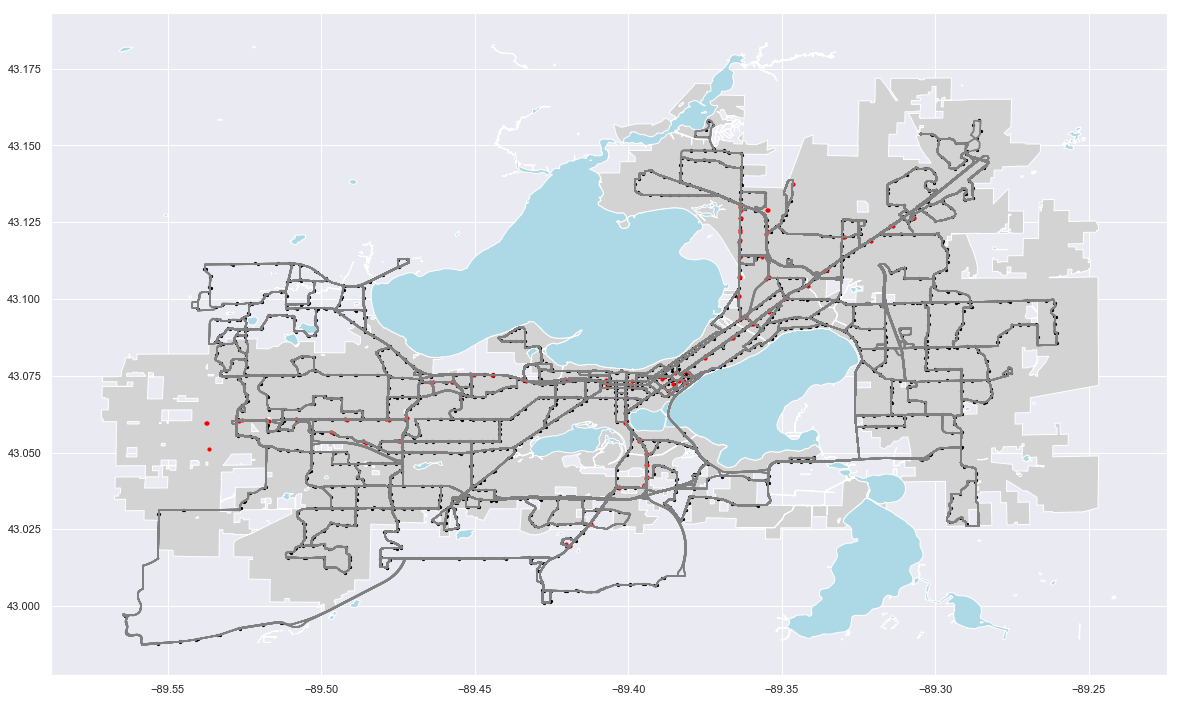

In [32]:
#metro bus route data 2019
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes
transit_data = geopandas.read_file("Metro_Transit_Bus_Route_Trips")

list_transit = []
for index, row in transit_data.iterrows():
    list_transit.append(row["geometry"])
    
transit_series = pd.Series(list_transit)
transit_coord = pd.DataFrame({"Coordinates": transit_series})
transit_coord = geopandas.GeoDataFrame(transit_coord, geometry='Coordinates')

ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
transit_coord.plot(color='grey', ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 5)
brt_coord.plot(color="red", ax=ax, markersize= 10)

In [33]:
pd.set_option('max_colwidth', 100)
pd.set_option('max_column', 50)
transit_data


,OBJECTID,PointsToLi,PointsTo_1,trips_rout,trips_ro_1,trips_ro_2,trips_ro_3,trips_ro_4,trips_ro_5,trips_ro_6,trips_ro_7,trips_ro_8,trips_ro_9,trips_ro10,trips_ro11,trips_ro12,trips_ro13,trips_ro14,trips_ro15,trips_ro16,trips_ro17,trips_ro18,trips_ro19,service_id,service_na,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,PK_MD_WE,ShapeSTLen,trips_ro20,trips_ro21,trips_ro22,geometry
0,22069,50881,50881,8298,1,85_WKD,874327,CAPITOL SQUARE,0,CapSq,182821,50881,1E,None,35820,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
1,22070,50881,50881,8298,1,85_WKD,874326,CAPITOL SQUARE,0,CapSq,182820,50881,1E,None,39420,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
2,22071,50881,50881,8298,1,85_WKD,874325,CAPITOL SQUARE,0,CapSq,182821,50881,1E,None,43020,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
3,22072,50881,50881,8298,1,85_WKD,874324,CAPITOL SQUARE,0,CapSq,182820,50881,1E,None,46620,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
4,22073,50881,50881,8298,1,85_WKD,874323,CAPITOL SQUARE,0,CapSq,182821,50881,1E,None,50220,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
5,22074,50881,50881,8298,1,85_WKD,874322,CAPITOL SQUARE,0,CapSq,182820,50881,1E,None,53820,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
6,22075,50882,50882,8298,1,85_WKD,874328,OLD UNIV AV: VIA CAMPUS,1,Old University,182821,50882,1W,None,34560,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.3821..."
7,22076,50882,50882,8298,1,85_WKD,874329,OLD UNIV AV: VIA CAMPUS,1,Old University,182820,50882,1W,None,38160,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.3821..."
8,22077,50882,50882,8298,1,85_WKD,874330,OLD UNIV AV: VIA CAMPUS,1,Old University,182821,50882,1W,None,41760,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.3821..."
9,22078,50882,50882,8298,1,85_WKD,874331,OLD UNIV AV: VIA CAMPUS,1,Old University,182820,50882,1W,None,45360,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000

In [34]:
pd.set_option('max_colwidth', 100)
pd.set_option('max_column', 50)
transit_data['trips_ro_1'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 44, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 63, 67,
       68, 70, 71, 72, 73, 75, 78, 80, 81, 82, 84], dtype=int64)

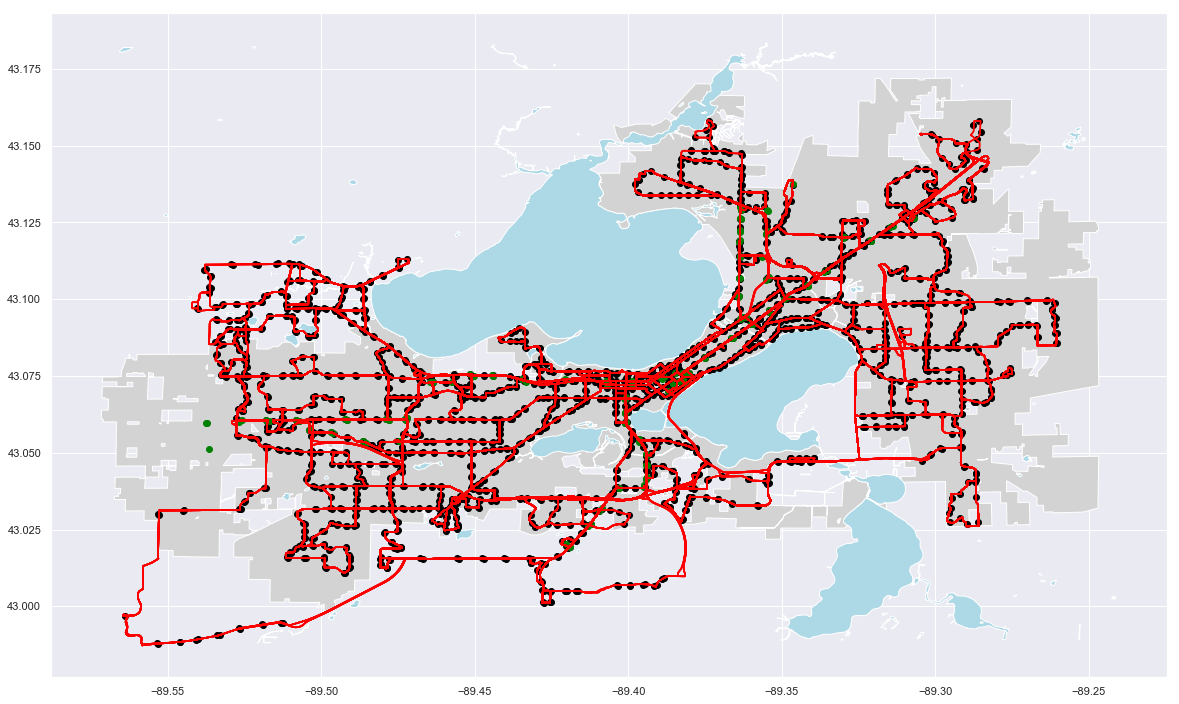

In [35]:
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
metro_coord.plot(color="black", ax=ax)
brt_coord.plot(color="green", ax=ax)
transit_coord.plot(color="red", ax=ax)

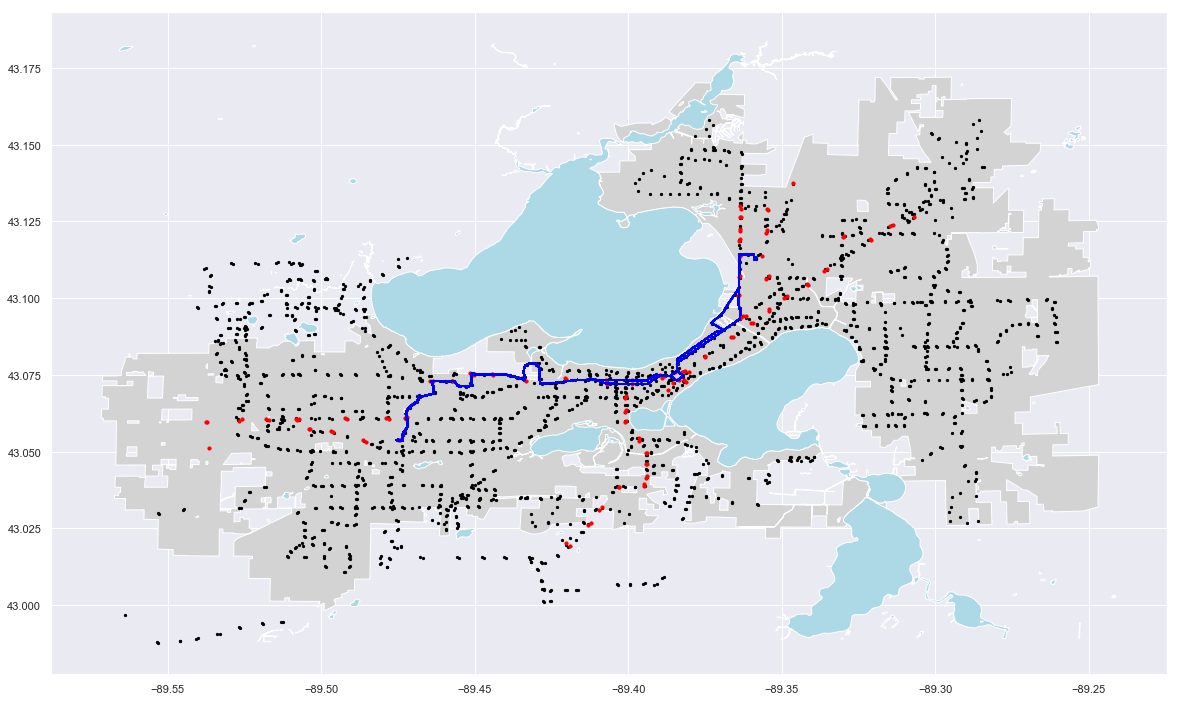

In [37]:
#mapping one transit at a time
list_transit = []
df = transit_data[transit_data['trips_ro_1']==2]
for index, row in df.iterrows():
    list_transit.append(row["geometry"])
    
transit_series = pd.Series(list_transit)
transit_coord = pd.DataFrame({"Coordinates": transit_series})

transit_coord = geopandas.GeoDataFrame(transit_coord, geometry='Coordinates')

ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
transit_coord.plot(color='blue', ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 5)
brt_coord.plot(color="red", ax=ax, markersize= 10)

In [ ]:
#routes of the same number differ by the standard weekday and recess weekday, as well as weekends routes
df




In [ ]:
df['service_na'].unique()

In [17]:
transit_data.loc[transit_data['service_na'].isin(['Weekday'])]

,OBJECTID,PointsToLi,PointsTo_1,trips_rout,trips_ro_1,trips_ro_2,trips_ro_3,trips_ro_4,trips_ro_5,trips_ro_6,trips_ro_7,trips_ro_8,trips_ro_9,trips_ro10,trips_ro11,trips_ro12,trips_ro13,trips_ro14,trips_ro15,trips_ro16,trips_ro17,trips_ro18,trips_ro19,service_id,service_na,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date,PK_MD_WE,ShapeSTLen,trips_ro20,trips_ro21,trips_ro22,geometry
0,22069,50881,50881,8298,1,85_WKD,874327,CAPITOL SQUARE,0,CapSq,182821,50881,1E,None,35820,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
1,22070,50881,50881,8298,1,85_WKD,874326,CAPITOL SQUARE,0,CapSq,182820,50881,1E,None,39420,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
2,22071,50881,50881,8298,1,85_WKD,874325,CAPITOL SQUARE,0,CapSq,182821,50881,1E,None,43020,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
3,22072,50881,50881,8298,1,85_WKD,874324,CAPITOL SQUARE,0,CapSq,182820,50881,1E,None,46620,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
4,22073,50881,50881,8298,1,85_WKD,874323,CAPITOL SQUARE,0,CapSq,182821,50881,1E,None,50220,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
5,22074,50881,50881,8298,1,85_WKD,874322,CAPITOL SQUARE,0,CapSq,182820,50881,1E,None,53820,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,15170.038428,None,None,None,"LINESTRING (-89.42863020308475 43.0720703101791, -89.42814820376813 43.07210531053178, -89.42712..."
6,22075,50882,50882,8298,1,85_WKD,874328,OLD UNIV AV: VIA CAMPUS,1,Old University,182821,50882,1W,None,34560,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.3821..."
7,22076,50882,50882,8298,1,85_WKD,874329,OLD UNIV AV: VIA CAMPUS,1,Old University,182820,50882,1W,None,38160,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.3821..."
8,22077,50882,50882,8298,1,85_WKD,874330,OLD UNIV AV: VIA CAMPUS,1,Old University,182821,50882,1W,None,41760,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000000,85_WKD,Weekday,1,1,1,1,1,0,0,20190303,20190511,010,18125.059539,None,None,None,"LINESTRING (-89.38210420032624 43.07466636449615, -89.38210420084749 43.07468636474267, -89.3821..."
9,22078,50882,50882,8298,1,85_WKD,874331,OLD UNIV AV: VIA CAMPUS,1,Old University,182820,50882,1W,None,45360,1,MMT,None,OLD UNIV:CAP SQR,3,http://www.cityofmadison.com/Metro/schedules/Route01/,E3D23E,000

In [18]:
transit_data['service_na'].unique()

array(['Weekday', 'Saturday', 'Sunday', 'Holiday', 'Weekday Extra',
       'Standard Weekday', 'Recess Weekday', 'Recess Saturday',
       'Recess Sunday', 'Standard Saturday', 'Standard Sunday',
       'Standard Mon-Thu', 'Standard Fri only', 'Latenight Saturday',
       'Latenight Sunday', 'Latenight Mon-Thu', 'Latenight Fri only'],
      dtype=object)

In [19]:
a = transit_data.loc[transit_data['service_na'].isin(['Standard Weekday', 'Recess Weekday','Standard Mon-Thu','Standard Fri only','Latenight Mon-Thu', 'Latenight Fri only'])]
a['trips_ro_1'].unique()

array([80, 81, 82, 84], dtype=int64)

In [20]:
b=transit_data[transit_data['service_na']== 'Weekday']
b['trips_ro_1'].unique()

array([ 1,  2,  3,  4,  5,  6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 44, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 67, 70, 71, 72, 73,
       75], dtype=int64)

In [21]:
c = transit_data.loc[transit_data['service_na'].isin(['Standard Weekday','Weekday'])]
c['trips_ro_1'].unique()

array([ 1,  2,  3,  4,  5,  6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 44, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 67, 70, 71, 72, 73,
       75, 80, 84], dtype=int64)

In [22]:
c['geometry']

c['length'] = c.apply(lambda x: ), axis = 1)

SyntaxError: invalid syntax (<ipython-input-22-7ab7ce5e4cad>, line 3)

In [ ]:
c

In [ ]:
#getting darker colors
all_colors = [k for k,v in pltc.cnames.items()]
all_color = [x for x in all_colors if 'white' not in x and 'light' not in x and 'yellow' not in x]
all_color

In [ ]:
#metro bus route data 2019
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 0.2)
brt_coord.plot(color="yellow", ax=ax, markersize= 0.2)

bus_list = []
bus_df = []
color_list = []
for index, row in c.iterrows():
    if row["trips_ro_1"] not in bus_list:
        list_transit = []
        list_transit.append(row["geometry"])
        transit_series = pd.Series(list_transit)
        transit_coord = pd.DataFrame({"Coordinates": transit_series})
        transit_coord = geopandas.GeoDataFrame(transit_coord, geometry='Coordinates')
        r_color = sample(all_color, 1)
        while (r_color in color_list and 'white' in r_color and 'light' in r_color) :
            r_color = sample(all_colors, 1)
        transit_coord.plot(color=r_color, ax=ax, markersize= 100)
        bus_list.append(row["trips_ro_1"])
        bus_df.append({'bus_route':row["trips_ro_1"], 'color': r_color[0]})
        color_list.append(r_color)

In [ ]:
uniq = transit_data["trips_ro_1"].unique()
uniq

In [ ]:
#metro bus route data 2019 updates
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-bus-routes
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
metro_coord.plot(color="black", ax=ax, markersize= 0.2)
brt_coord.plot(color="yellow", ax=ax, markersize= 0.2)

bus_list = []
bus_df = []
color_list = []
r_color = sample(all_color, 1)
for index, row in  c.iterrows():
        if  bus_list.count(row["trips_ro_1"]) < 10 :
            if not row["trips_ro_1"] in bus_list:
                while r_color in color_list:
                    r_color = sample(all_color, 1)
            list_transit = []
            list_transit.append(row["geometry"])
            transit_series = pd.Series(list_transit)
            transit_coord = pd.DataFrame({"Coordinates": transit_series})
            transit_coord = geopandas.GeoDataFrame(transit_coord, geometry='Coordinates')
            transit_coord.plot(color=r_color, ax=ax, markersize= 100)
            bus_list.append(row["trips_ro_1"])
            bus_df.append({'bus_route':row["trips_ro_1"], 'color': r_color[0]})
            color_list.append(r_color)


In [ ]:
pd.set_option('max_column', 65)
bus_dff = pd.DataFrame(bus_df)
bus_dff['color'].unique()

In [ ]:
bus_dff.transpose()

In [ ]:
# #metro data
metro_data = geopandas.read_file("MetroBusRoutes.gdb")
# list_metro = []
# for index, row in metro_data.iterrows():
#     list_metro.append(row["geometry"])

# metro_series = pd.Series(list_metro)
# metro_coord = pd.DataFrame({"Coordinates": metro_series})
# metro_coord = geopandas.GeoDataFrame(metro_coord, geometry='Coordinates')
metro_data

In [ ]:
# #BRT data
# brt_data = geopandas.read_file("BRT.gdb")
# list_brt = []
# for index, row in brt_data.iterrows():
#     list_brt.append(row["geometry"])

# brt_series = pd.Series(list_brt)
# brt_coord = pd.DataFrame({"Coordinates": brt_series})
# brt_coord = geopandas.GeoDataFrame(brt_coord, geometry='Coordinates')



In [ ]:
# #red dot
rd_data = geopandas.read_file("Red_Dot_19.gdb")
# list_rd = []
# for index, row in rd_data.iterrows():
#     list_rd.append(row["geometry"])


# #     list_rd.append(row["geometry"])

# rd_series = pd.Series(list_rd)
# rd_coord = pd.DataFrame({"Coordinates": rd_series})
# rd_coord = geopandas.GeoDataFrame(rd_coord, geometry='Coordinates')

# ax = madison.plot(color="lightgray", figsize=(20,20))
# lakes.plot(color="lightblue", ax=ax)
# bs.plot(color="black", ax=ax, alpha=0.25)
#
# data.fillna(0, inplace=True)
# homedic = []
# for index in data["OBJECTID"]:
#     locat = data[data["OBJECTID"]==index]
#     coordinates = locat["coordinates"]
#     for coor in coordinates:
#         homedic.append(LineString([(float(coor[0]), float(coor[1])), (float(coor[2]), float(coor[3]))]))     
# hcoords = pd.Series(homedic)
# hs = pd.DataFrame({"Coordinates": hcoords})
# hs = geopandas.GeoDataFrame(hs, geometry='Coordinates')
# hs.plot(color="red", ax=ax, alpha=0.25)

rd_data

In [ ]:
# ax = madison.plot(color="lightgray", figsize=(20,20))
# lakes.plot(color="lightblue", ax=ax)
# ax.set_xlim(760000,860000) 
# ax.set_ylim(450000,515000)
# metro_coord.plot(color="black", ax=ax)
# brt_coord.plot(color="red", ax=ax)
# rd_coord.plot(color="pink", ax=ax)

In [ ]:
#riderships by number 
#http://data-cityofmadison.opendata.arcgis.com/datasets/metro-transit-ridership-by-intersection?geometry=-89.934%2C42.985%2C-88.891%2C43.161
ridership = geopandas.read_file("Metro_Transit_Ridership_by_Intersection")
below10 = ridership[ridership['Weekday'] < 10] # 547 rows
over10 = ridership[ridership['Weekday'] >10]
between100and10 = over10[over10['Weekday'] < 100] # 382  rows
over100 = ridership[ridership["Weekday"] > 100] #84 rows
below10

In [ ]:
#ridership by intersection
#below 10 passengers
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
transit_coord.plot(color='lime', ax=ax, alpha=0.1)
metro_coord.plot(color="black", ax=ax, markersize= 0.5)
brt_coord.plot(color="gray", ax=ax, markersize= 10)

list_transit = []
for index, row in below10.iterrows():
    list_transit.append((Point(float(row['Lon']),float(row['Lat']))))
transit_series = pd.Series(list_transit)
transit_coord = pd.DataFrame({"Coordinates": transit_series})
transit_coord = geopandas.GeoDataFrame(transit_coord, geometry='Coordinates')
#below1 100 above 10
dic = range(0, len(between100and10))
dic = list(dic)
i = 0
for index, row in between100and10.iterrows():
    homedic = []
    homedic.append((Point(float(row['Lon']),float(row['Lat']))))
    hcoords = pd.Series(homedic)
    hs = pd.DataFrame({"Coordinates": hcoords})
    hs = geopandas.GeoDataFrame(hs, geometry='Coordinates')
    total = row["Weekday"]
    pop=float(total*5)
    dic[i] = hs
    dic[i].plot(color="blue", ax=ax, markersize=pop, alpha= 0.1)
    i += 1
#below1 100 above 10
dic1 = range(0, len(over100))
dic1 = list(dic1)
i = 0
for index, row in over100.iterrows():
    homedic = []
    homedic.append((Point(float(row['Lon']),float(row['Lat']))))
    hcoords = pd.Series(homedic)
    hs = pd.DataFrame({"Coordinates": hcoords})
    hs = geopandas.GeoDataFrame(hs, geometry='Coordinates')
    total = row["Weekday"]
    pop=float(total*5)
    dic1[i] = hs
    dic1[i].plot(color="red", ax=ax, markersize=pop, alpha= 0.1)
    i += 1



In [ ]:
#ridership by intersection
#below 10 passengers
ax = madison.plot(color="lightgray", figsize=(20,20))
lakes.plot(color="lightblue", ax=ax)
transit_coord.plot(color='lime', ax=ax, alpha=0.1)
metro_coord.plot(color="black", ax=ax, markersize= 0.5)
brt_coord.plot(color="gray", ax=ax, markersize= 10)

list_transit = []
for index, row in below10.iterrows():
    list_transit.append((Point(float(row['Lon']),float(row['Lat']))))
transit_series = pd.Series(list_transit)
transit_coord = pd.DataFrame({"Coordinates": transit_series})
transit_coord = geopandas.GeoDataFrame(transit_coord, geometry='Coordinates')
#below1 100 above 10
dic = range(0, len(between100and10))
dic = list(dic)
i = 0
for index, row in between100and10.iterrows():
    homedic = []
    homedic.append((Point(float(row['Lon']),float(row['Lat']))))
    hcoords = pd.Series(homedic)
    hs = pd.DataFrame({"Coordinates": hcoords})
    hs = geopandas.GeoDataFrame(hs, geometry='Coordinates')
    total = row["Weekday"]
    pop=float(total*5)
    dic[i] = hs
    dic[i].plot(color="blue", ax=ax, markersize=pop, alpha= 0.1)
    i += 1
#below1 100 above 10
dic1 = range(0, len(over100))
dic1 = list(dic1)
i = 0
for index, row in over100.iterrows():
    homedic = []
    homedic.append((Point(float(row['Lon']),float(row['Lat']))))
    hcoords = pd.Series(homedic)
    hs = pd.DataFrame({"Coordinates": hcoords})
    hs = geopandas.GeoDataFrame(hs, geometry='Coordinates')
    total = row["Weekday"]
    pop=float(total*5)
    dic1[i] = hs
    dic1[i].plot(color="red", ax=ax, markersize=pop, alpha= 0.1)
    i += 1



In [ ]:
for index in adata["OBJECTID"]:
    locat = adata[adata["OBJECTID"]==index]
    coordinates = locat["coordinates"]
    for coor in coordinates:
        homedic = []
        homedic.append(Point(float(coor[0]),float(coor[1])))
        hcoords = pd.Series(homedic)
        hs = pd.DataFrame({"Coordinates": hcoords})
        hs = geopandas.GeoDataFrame(hs, geometry='Coordinates')
        total = locat["Total"]
        pop=float(total)*5
        dic[i] = hs
        dic[i].plot(color="blue", ax=ax, markersize=pop, alpha=0.1)
        i += 1